In [1]:
import networkx as nx
from cdlib import algorithms 
import time
import matplotlib.pyplot as plt 
import numpy as np

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap'}


In [2]:
 def per_algorithm(algo, bas: []): 
        time_modularity = []
        algo_name = algo.__name__

        # for each graph in the array of graphs 
        for ba in bas:
            start_time = time.time()
            # calculate modularity of communities
            comms = algo(ba)
            running_time = time.time() - start_time
            # store calculated values 
            time_modularity.append((ba.number_of_nodes(), running_time, len(comms.communities))) 
            pass
        
        return algo_name, time_modularity

In [3]:
 def aplly_algorithm(algos: [], amount: int, init_size: int): 
    bas = []
    result = {}
    
    # generate all required Barabasi-Albert graphs
    for i in range(1, amount + 1):
        ba = nx.barabasi_albert_graph(i * init_size, 3) 
        bas.append(ba)
        pass
    
    # apply selected algorithm to all graphs
    for algo in algos:
        algo_name, time_modularity = per_algorithm(algo, bas) 
        result[algo_name] = time_modularity
        pass
    return result

In [14]:
def calculate_average(results: {}):
    # store average modularity and running time for each algorithm
    averages = {}
    
    for algo, time_modularity in results.items():
        total_time = 0
        total_modularity = 0
        
        for tm in time_modularity:
            total_time += tm[1]
            total_modularity += tm[2]
            pass
        
        average_time = total_time / len(time_modularity)
        average_modularity = total_modularity / len(time_modularity)
        
        averages[algo] = (average_time, average_modularity)
        pass
    
    return averages

In [15]:
def show(title: str, time_modularity: []):
    
    # get data out of arary of tuples, and put them in to numpy arrays
    x_size = np.array([item[0] for item in time_modularity]) 
    y_time = np.array([item[1] for item in time_modularity]) 
    y_modularity = np.array([item[2] for item in time_modularity])
    
    # draw the chart of time
    plt.subplot(1, 3, 1)
    plt.plot(x_size, y_time)
    plt.xlabel("Number of node")
    plt.ylabel("Seconds")
    plt.title("TIME")
    
    # draw the chart of number of modularity
    plt.subplot(1, 3, 3)
    plt.plot(x_size, y_modularity)
    plt.title("MODULARITY")
    plt.ylabel("Number of modularity")
    plt.xlabel("Number of node")
    
    plt.suptitle(f'{title.upper()} ALGORITHM')
    
    plt.show() 
    
    pass


In [16]:
def show_all(applied_result: {}, averages: {}):
    for key, value in applied_result.items():
        show(key, value)
        print(f'Average time and modularity for {key}: {averages[key]}')
        pass 
    pass

In [19]:
def main(algos: [], amount: int, init_size: int):
    # collect all calculated results
    applied_result = aplly_algorithm(algos, amount, init_size) 
    # calculate the average modularity and running time for each algorithm
    averages = calculate_average(applied_result)
    # export result to charts
    show_all(applied_result, averages)
    pass

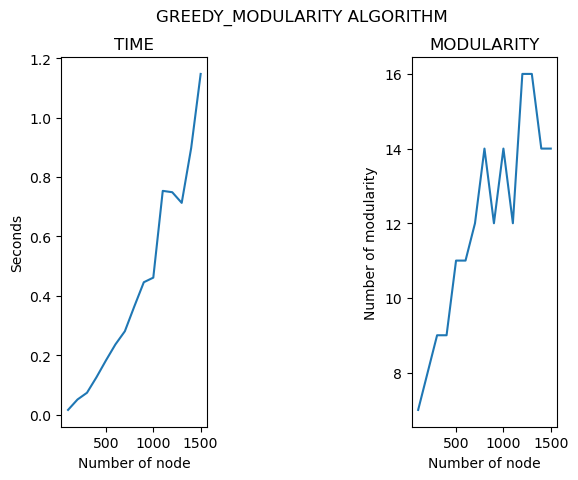

Average time and modularity for greedy_modularity: (0.43314873377482094, 11.933333333333334)


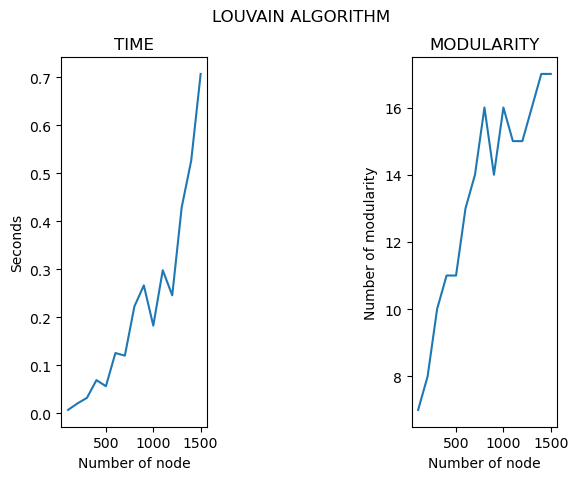

Average time and modularity for louvain: (0.22037386894226074, 13.333333333333334)


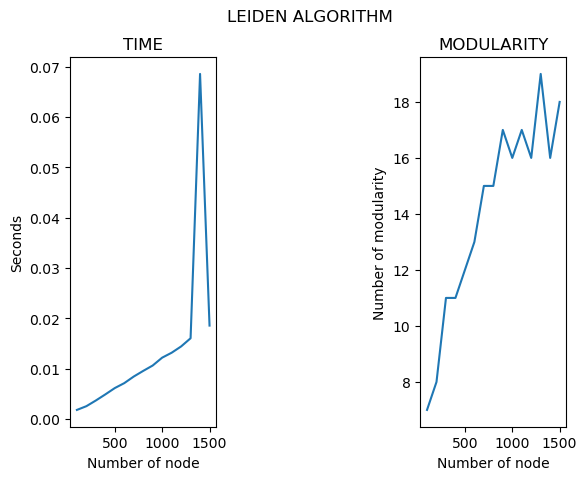

Average time and modularity for leiden: (0.01315150260925293, 14.066666666666666)


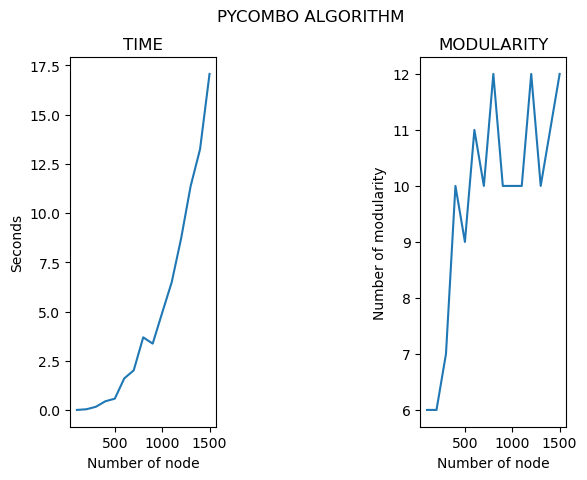

Average time and modularity for pycombo: (4.914461596806844, 9.733333333333333)


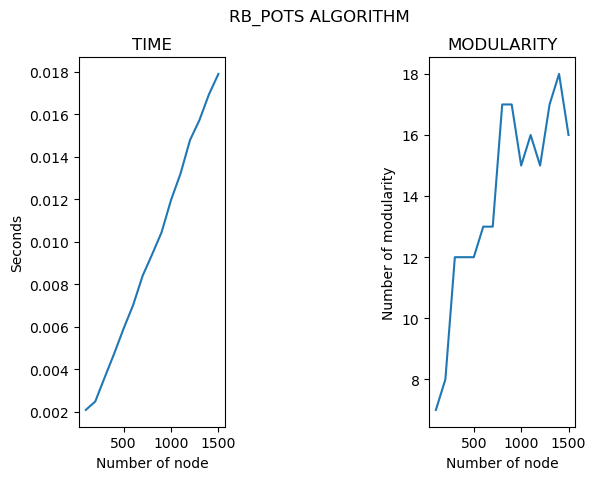

Average time and modularity for rb_pots: (0.009644444783528645, 13.866666666666667)


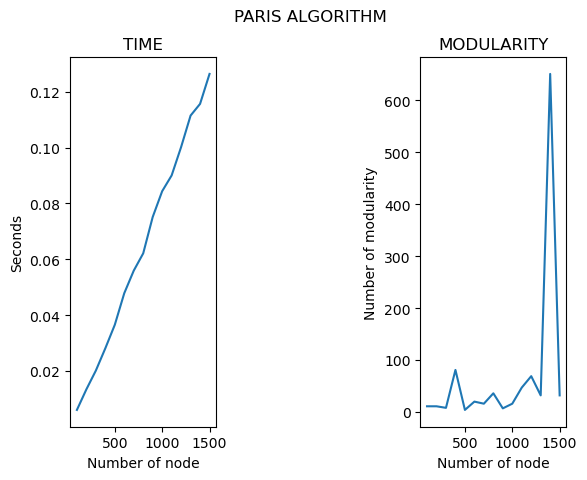

Average time and modularity for paris: (0.06490046183268229, 69.4)


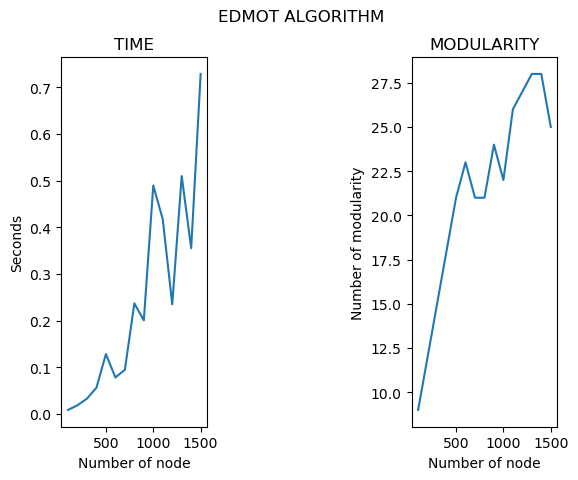

Average time and modularity for edmot: (0.23937468528747557, 21.333333333333332)


In [20]:
 if __name__ == '__main__':
        
    # list of required algorithms
    required_algorithms = [algorithms.greedy_modularity, algorithms.louvain,algorithms.leiden, algorithms.pycombo, algorithms.rb_pots, algorithms.paris, algorithms.edmot]
    
    # assume that the number of test is 15
    testing_amount = 15
    
    # assume that the initialized number of node is 100 
    testing_init_size = 100
    
    # apply all algorithms and make all charts 
    main(algos=required_algorithms, amount=testing_amount,init_size=testing_init_size) 
    pass